## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.754
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              92.07
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   3.30e-110
Time:                        16:00:02   Log-Likelihood:                         -300.49
No. Observations:                 404   AIC:                                      627.0
Df Residuals:                     391   BIC:                                      679.0
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

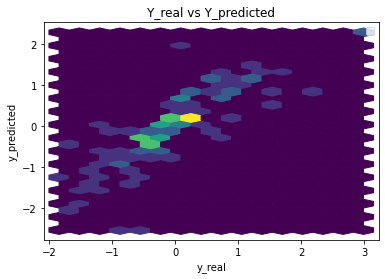

Performance Metrics
Mean Squared Error: 0.28046974746279085
Mean Absolute Error: 0.364211830217422
Manhattan distance: 37.14960668217706
Euclidean distance: 5.348636671265367


Stats Model MAE 0.364211830217422


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.03548
0:	learn: 1.0047033	total: 78.1ms	remaining: 1m 18s
1:	learn: 0.9841042	total: 81.6ms	remaining: 40.7s
2:	learn: 0.9626492	total: 84.8ms	remaining: 28.2s
3:	learn: 0.9450055	total: 86.3ms	remaining: 21.5s
4:	learn: 0.9252325	total: 88.1ms	remaining: 17.5s
5:	learn: 0.9065838	total: 90.4ms	remaining: 15s
6:	learn: 0.8887023	total: 93.1ms	remaining: 13.2s
7:	learn: 0.8707648	total: 95.6ms	remaining: 11.9s
8:	learn: 0.8540089	total: 97.4ms	remaining: 10.7s
9:	learn: 0.8366648	total: 98.8ms	remaining: 9.78s
10:	learn: 0.8203443	total: 101ms	remaining: 9.1s
11:	learn: 0.8040461	total: 108ms	remaining: 8.86s


12:	learn: 0.7892749	total: 110ms	remaining: 8.38s
13:	learn: 0.7736762	total: 112ms	remaining: 7.9s
14:	learn: 0.7593683	total: 114ms	remaining: 7.49s
15:	learn: 0.7445336	total: 116ms	remaining: 7.1s
16:	learn: 0.7326862	total: 117ms	remaining: 6.76s
17:	learn: 0.7194892	total: 118ms	remaining: 6.46s
18:	learn: 0.7064447	total: 120ms	remaining: 6.19s
19:	learn: 0.6927316	total: 121ms	remaining: 5.94s
20:	learn: 0.6781225	total: 123ms	remaining: 5.72s
21:	learn: 0.6669463	total: 124ms	remaining: 5.52s
22:	learn: 0.6561653	total: 126ms	remaining: 5.34s
23:	learn: 0.6456442	total: 127ms	remaining: 5.17s
24:	learn: 0.6356945	total: 129ms	remaining: 5.02s
25:	learn: 0.6255611	total: 130ms	remaining: 4.89s
26:	learn: 0.6159621	total: 132ms	remaining: 4.77s


27:	learn: 0.6055409	total: 134ms	remaining: 4.65s
28:	learn: 0.5961717	total: 140ms	remaining: 4.7s
29:	learn: 0.5854010	total: 144ms	remaining: 4.67s
30:	learn: 0.5757027	total: 147ms	remaining: 4.6s
31:	learn: 0.5669906	total: 151ms	remaining: 4.57s
32:	learn: 0.5577537	total: 153ms	remaining: 4.49s
33:	learn: 0.5505630	total: 155ms	remaining: 4.39s
34:	learn: 0.5431553	total: 156ms	remaining: 4.3s
35:	learn: 0.5355619	total: 158ms	remaining: 4.22s
36:	learn: 0.5281075	total: 159ms	remaining: 4.14s
37:	learn: 0.5205779	total: 160ms	remaining: 4.05s
38:	learn: 0.5131596	total: 162ms	remaining: 3.98s
39:	learn: 0.5047741	total: 163ms	remaining: 3.91s
40:	learn: 0.4988372	total: 164ms	remaining: 3.85s
41:	learn: 0.4911267	total: 166ms	remaining: 3.78s
42:	learn: 0.4856105	total: 167ms	remaining: 3.72s
43:	learn: 0.4785046	total: 169ms	remaining: 3.66s
44:	learn: 0.4729077	total: 170ms	remaining: 3.61s
45:	learn: 0.4659392	total: 171ms	remaining: 3.55s
46:	learn: 0.4608329	total: 173ms	

50:	learn: 0.4390805	total: 179ms	remaining: 3.34s
51:	learn: 0.4350607	total: 181ms	remaining: 3.3s
52:	learn: 0.4308570	total: 183ms	remaining: 3.26s
53:	learn: 0.4263113	total: 185ms	remaining: 3.24s
54:	learn: 0.4217895	total: 187ms	remaining: 3.22s
55:	learn: 0.4177996	total: 189ms	remaining: 3.19s
56:	learn: 0.4140247	total: 190ms	remaining: 3.15s
57:	learn: 0.4097681	total: 192ms	remaining: 3.11s
58:	learn: 0.4057356	total: 193ms	remaining: 3.08s
59:	learn: 0.4014700	total: 194ms	remaining: 3.04s
60:	learn: 0.3981865	total: 196ms	remaining: 3.01s
61:	learn: 0.3936811	total: 197ms	remaining: 2.98s
62:	learn: 0.3895881	total: 198ms	remaining: 2.95s
63:	learn: 0.3867088	total: 200ms	remaining: 2.93s
64:	learn: 0.3829835	total: 202ms	remaining: 2.9s
65:	learn: 0.3798958	total: 203ms	remaining: 2.87s
66:	learn: 0.3763456	total: 205ms	remaining: 2.85s
67:	learn: 0.3725572	total: 206ms	remaining: 2.82s
68:	learn: 0.3694567	total: 207ms	remaining: 2.8s
69:	learn: 0.3665626	total: 209ms	

128:	learn: 0.2603347	total: 292ms	remaining: 1.97s
129:	learn: 0.2589755	total: 294ms	remaining: 1.97s
130:	learn: 0.2583658	total: 295ms	remaining: 1.96s
131:	learn: 0.2572026	total: 297ms	remaining: 1.95s
132:	learn: 0.2558767	total: 298ms	remaining: 1.94s
133:	learn: 0.2549213	total: 299ms	remaining: 1.93s
134:	learn: 0.2537773	total: 301ms	remaining: 1.93s
135:	learn: 0.2526927	total: 302ms	remaining: 1.92s
136:	learn: 0.2513849	total: 304ms	remaining: 1.91s
137:	learn: 0.2504340	total: 305ms	remaining: 1.9s
138:	learn: 0.2494224	total: 306ms	remaining: 1.9s
139:	learn: 0.2487186	total: 308ms	remaining: 1.89s
140:	learn: 0.2478898	total: 309ms	remaining: 1.88s
141:	learn: 0.2472755	total: 311ms	remaining: 1.88s
142:	learn: 0.2463546	total: 312ms	remaining: 1.87s


143:	learn: 0.2453613	total: 313ms	remaining: 1.86s
144:	learn: 0.2445467	total: 315ms	remaining: 1.86s
145:	learn: 0.2438677	total: 317ms	remaining: 1.85s
146:	learn: 0.2432985	total: 319ms	remaining: 1.85s
147:	learn: 0.2426001	total: 320ms	remaining: 1.84s
148:	learn: 0.2416129	total: 321ms	remaining: 1.84s
149:	learn: 0.2408746	total: 323ms	remaining: 1.83s
150:	learn: 0.2396732	total: 324ms	remaining: 1.82s
151:	learn: 0.2389706	total: 326ms	remaining: 1.82s
152:	learn: 0.2382773	total: 327ms	remaining: 1.81s
153:	learn: 0.2376887	total: 328ms	remaining: 1.8s
154:	learn: 0.2371082	total: 330ms	remaining: 1.8s
155:	learn: 0.2363061	total: 331ms	remaining: 1.79s
156:	learn: 0.2356885	total: 332ms	remaining: 1.78s
157:	learn: 0.2349659	total: 334ms	remaining: 1.78s
158:	learn: 0.2340563	total: 335ms	remaining: 1.77s
159:	learn: 0.2331043	total: 337ms	remaining: 1.77s
160:	learn: 0.2325171	total: 338ms	remaining: 1.76s
161:	learn: 0.2318287	total: 339ms	remaining: 1.75s
162:	learn: 0.

174:	learn: 0.2230700	total: 360ms	remaining: 1.69s
175:	learn: 0.2226012	total: 362ms	remaining: 1.69s
176:	learn: 0.2217653	total: 365ms	remaining: 1.7s
177:	learn: 0.2212635	total: 368ms	remaining: 1.7s
178:	learn: 0.2208310	total: 370ms	remaining: 1.7s
179:	learn: 0.2199962	total: 371ms	remaining: 1.69s
180:	learn: 0.2191633	total: 373ms	remaining: 1.69s
181:	learn: 0.2184600	total: 376ms	remaining: 1.69s
182:	learn: 0.2179691	total: 377ms	remaining: 1.68s
183:	learn: 0.2173970	total: 379ms	remaining: 1.68s
184:	learn: 0.2163898	total: 381ms	remaining: 1.68s
185:	learn: 0.2159182	total: 382ms	remaining: 1.67s
186:	learn: 0.2150026	total: 384ms	remaining: 1.67s
187:	learn: 0.2146197	total: 385ms	remaining: 1.66s
188:	learn: 0.2141324	total: 386ms	remaining: 1.66s
189:	learn: 0.2135377	total: 388ms	remaining: 1.65s
190:	learn: 0.2128190	total: 389ms	remaining: 1.65s
191:	learn: 0.2122485	total: 390ms	remaining: 1.64s
192:	learn: 0.2116249	total: 392ms	remaining: 1.64s
193:	learn: 0.2

247:	learn: 0.1828396	total: 472ms	remaining: 1.43s
248:	learn: 0.1823241	total: 474ms	remaining: 1.43s
249:	learn: 0.1818145	total: 475ms	remaining: 1.42s
250:	learn: 0.1812591	total: 476ms	remaining: 1.42s
251:	learn: 0.1810572	total: 478ms	remaining: 1.42s
252:	learn: 0.1805677	total: 479ms	remaining: 1.41s
253:	learn: 0.1800823	total: 481ms	remaining: 1.41s
254:	learn: 0.1798995	total: 482ms	remaining: 1.41s
255:	learn: 0.1791930	total: 483ms	remaining: 1.41s
256:	learn: 0.1789151	total: 485ms	remaining: 1.4s
257:	learn: 0.1783000	total: 486ms	remaining: 1.4s
258:	learn: 0.1778692	total: 488ms	remaining: 1.39s
259:	learn: 0.1776334	total: 489ms	remaining: 1.39s
260:	learn: 0.1769326	total: 490ms	remaining: 1.39s


261:	learn: 0.1766578	total: 492ms	remaining: 1.39s
262:	learn: 0.1761159	total: 494ms	remaining: 1.38s
263:	learn: 0.1756712	total: 496ms	remaining: 1.38s
264:	learn: 0.1754796	total: 497ms	remaining: 1.38s
265:	learn: 0.1753257	total: 499ms	remaining: 1.38s
266:	learn: 0.1750974	total: 500ms	remaining: 1.37s
267:	learn: 0.1748685	total: 502ms	remaining: 1.37s
268:	learn: 0.1747261	total: 503ms	remaining: 1.37s
269:	learn: 0.1741880	total: 505ms	remaining: 1.36s
270:	learn: 0.1738145	total: 506ms	remaining: 1.36s
271:	learn: 0.1735964	total: 508ms	remaining: 1.36s
272:	learn: 0.1733033	total: 509ms	remaining: 1.35s
273:	learn: 0.1729111	total: 510ms	remaining: 1.35s
274:	learn: 0.1724300	total: 512ms	remaining: 1.35s
275:	learn: 0.1722069	total: 513ms	remaining: 1.35s
276:	learn: 0.1716974	total: 515ms	remaining: 1.34s
277:	learn: 0.1712192	total: 516ms	remaining: 1.34s
278:	learn: 0.1707104	total: 518ms	remaining: 1.34s
279:	learn: 0.1700675	total: 519ms	remaining: 1.33s
280:	learn: 

295:	learn: 0.1641585	total: 542ms	remaining: 1.29s
296:	learn: 0.1637022	total: 544ms	remaining: 1.29s
297:	learn: 0.1631059	total: 545ms	remaining: 1.28s
298:	learn: 0.1625795	total: 547ms	remaining: 1.28s
299:	learn: 0.1620499	total: 548ms	remaining: 1.28s
300:	learn: 0.1617827	total: 550ms	remaining: 1.28s
301:	learn: 0.1614005	total: 551ms	remaining: 1.27s
302:	learn: 0.1609166	total: 552ms	remaining: 1.27s
303:	learn: 0.1604457	total: 554ms	remaining: 1.27s
304:	learn: 0.1602144	total: 555ms	remaining: 1.26s
305:	learn: 0.1598823	total: 556ms	remaining: 1.26s
306:	learn: 0.1594175	total: 558ms	remaining: 1.26s
307:	learn: 0.1592427	total: 559ms	remaining: 1.26s
308:	learn: 0.1586133	total: 560ms	remaining: 1.25s
309:	learn: 0.1581040	total: 562ms	remaining: 1.25s
310:	learn: 0.1576912	total: 563ms	remaining: 1.25s
311:	learn: 0.1573025	total: 565ms	remaining: 1.25s
312:	learn: 0.1571148	total: 566ms	remaining: 1.24s
313:	learn: 0.1567757	total: 568ms	remaining: 1.24s
314:	learn: 

353:	learn: 0.1440871	total: 651ms	remaining: 1.19s
354:	learn: 0.1438480	total: 653ms	remaining: 1.19s
355:	learn: 0.1437153	total: 655ms	remaining: 1.18s
356:	learn: 0.1435881	total: 656ms	remaining: 1.18s
357:	learn: 0.1432313	total: 658ms	remaining: 1.18s
358:	learn: 0.1430433	total: 659ms	remaining: 1.18s
359:	learn: 0.1425676	total: 661ms	remaining: 1.17s
360:	learn: 0.1421423	total: 662ms	remaining: 1.17s
361:	learn: 0.1417175	total: 663ms	remaining: 1.17s
362:	learn: 0.1414846	total: 665ms	remaining: 1.17s
363:	learn: 0.1413865	total: 666ms	remaining: 1.16s
364:	learn: 0.1411937	total: 668ms	remaining: 1.16s
365:	learn: 0.1410365	total: 669ms	remaining: 1.16s
366:	learn: 0.1406862	total: 671ms	remaining: 1.16s


367:	learn: 0.1404137	total: 673ms	remaining: 1.16s
368:	learn: 0.1403603	total: 675ms	remaining: 1.15s
369:	learn: 0.1401759	total: 676ms	remaining: 1.15s
370:	learn: 0.1401184	total: 677ms	remaining: 1.15s
371:	learn: 0.1398168	total: 679ms	remaining: 1.15s
372:	learn: 0.1394541	total: 680ms	remaining: 1.14s
373:	learn: 0.1391462	total: 682ms	remaining: 1.14s
374:	learn: 0.1390101	total: 683ms	remaining: 1.14s
375:	learn: 0.1389320	total: 684ms	remaining: 1.14s
376:	learn: 0.1386163	total: 686ms	remaining: 1.13s
377:	learn: 0.1383968	total: 687ms	remaining: 1.13s
378:	learn: 0.1380005	total: 689ms	remaining: 1.13s
379:	learn: 0.1377344	total: 690ms	remaining: 1.13s
380:	learn: 0.1374101	total: 691ms	remaining: 1.12s
381:	learn: 0.1372525	total: 693ms	remaining: 1.12s
382:	learn: 0.1371495	total: 694ms	remaining: 1.12s
383:	learn: 0.1369993	total: 696ms	remaining: 1.11s
384:	learn: 0.1369079	total: 697ms	remaining: 1.11s
385:	learn: 0.1367894	total: 698ms	remaining: 1.11s
386:	learn: 

400:	learn: 0.1333764	total: 721ms	remaining: 1.08s
401:	learn: 0.1332097	total: 722ms	remaining: 1.07s
402:	learn: 0.1329140	total: 724ms	remaining: 1.07s
403:	learn: 0.1326076	total: 725ms	remaining: 1.07s
404:	learn: 0.1323655	total: 727ms	remaining: 1.07s
405:	learn: 0.1322481	total: 728ms	remaining: 1.06s
406:	learn: 0.1319418	total: 729ms	remaining: 1.06s
407:	learn: 0.1315571	total: 731ms	remaining: 1.06s
408:	learn: 0.1312847	total: 733ms	remaining: 1.06s
409:	learn: 0.1310172	total: 736ms	remaining: 1.06s
410:	learn: 0.1307638	total: 740ms	remaining: 1.06s
411:	learn: 0.1305972	total: 742ms	remaining: 1.06s
412:	learn: 0.1301968	total: 745ms	remaining: 1.06s
413:	learn: 0.1298888	total: 748ms	remaining: 1.06s
414:	learn: 0.1296222	total: 749ms	remaining: 1.06s
415:	learn: 0.1292388	total: 753ms	remaining: 1.06s
416:	learn: 0.1289475	total: 755ms	remaining: 1.05s
417:	learn: 0.1286510	total: 756ms	remaining: 1.05s
418:	learn: 0.1282612	total: 758ms	remaining: 1.05s
419:	learn: 

453:	learn: 0.1205619	total: 817ms	remaining: 983ms
454:	learn: 0.1202040	total: 820ms	remaining: 982ms
455:	learn: 0.1201324	total: 821ms	remaining: 980ms
456:	learn: 0.1199422	total: 823ms	remaining: 977ms
457:	learn: 0.1196675	total: 824ms	remaining: 975ms
458:	learn: 0.1195946	total: 825ms	remaining: 973ms
459:	learn: 0.1192346	total: 827ms	remaining: 971ms
460:	learn: 0.1190814	total: 828ms	remaining: 969ms
461:	learn: 0.1188564	total: 830ms	remaining: 966ms
462:	learn: 0.1185042	total: 831ms	remaining: 964ms
463:	learn: 0.1182171	total: 833ms	remaining: 962ms
464:	learn: 0.1179917	total: 834ms	remaining: 959ms
465:	learn: 0.1177220	total: 835ms	remaining: 957ms
466:	learn: 0.1175652	total: 836ms	remaining: 955ms


467:	learn: 0.1172987	total: 839ms	remaining: 954ms
468:	learn: 0.1168861	total: 844ms	remaining: 956ms
469:	learn: 0.1167671	total: 855ms	remaining: 964ms
470:	learn: 0.1165772	total: 859ms	remaining: 964ms
471:	learn: 0.1164716	total: 860ms	remaining: 962ms
472:	learn: 0.1162524	total: 862ms	remaining: 960ms
473:	learn: 0.1160467	total: 863ms	remaining: 958ms
474:	learn: 0.1158193	total: 865ms	remaining: 956ms
475:	learn: 0.1155412	total: 866ms	remaining: 953ms
476:	learn: 0.1155097	total: 867ms	remaining: 951ms
477:	learn: 0.1152547	total: 869ms	remaining: 948ms
478:	learn: 0.1149751	total: 870ms	remaining: 946ms
479:	learn: 0.1147002	total: 872ms	remaining: 945ms
480:	learn: 0.1144857	total: 873ms	remaining: 942ms
481:	learn: 0.1142311	total: 875ms	remaining: 940ms
482:	learn: 0.1141656	total: 876ms	remaining: 938ms
483:	learn: 0.1139244	total: 877ms	remaining: 935ms
484:	learn: 0.1137081	total: 879ms	remaining: 933ms
485:	learn: 0.1136496	total: 880ms	remaining: 931ms
486:	learn: 

487:	learn: 0.1131999	total: 884ms	remaining: 927ms
488:	learn: 0.1129246	total: 958ms	remaining: 1s
489:	learn: 0.1128060	total: 961ms	remaining: 1000ms
490:	learn: 0.1125730	total: 964ms	remaining: 999ms
491:	learn: 0.1122990	total: 966ms	remaining: 998ms
492:	learn: 0.1121002	total: 969ms	remaining: 997ms
493:	learn: 0.1118316	total: 972ms	remaining: 995ms
494:	learn: 0.1116450	total: 975ms	remaining: 994ms
495:	learn: 0.1115972	total: 977ms	remaining: 993ms
496:	learn: 0.1113825	total: 984ms	remaining: 996ms
497:	learn: 0.1111322	total: 988ms	remaining: 996ms
498:	learn: 0.1110495	total: 990ms	remaining: 994ms
499:	learn: 0.1110094	total: 991ms	remaining: 991ms
500:	learn: 0.1107998	total: 993ms	remaining: 989ms
501:	learn: 0.1105510	total: 994ms	remaining: 986ms
502:	learn: 0.1102462	total: 996ms	remaining: 984ms
503:	learn: 0.1101044	total: 997ms	remaining: 981ms
504:	learn: 0.1100150	total: 999ms	remaining: 979ms
505:	learn: 0.1099737	total: 1s	remaining: 977ms


506:	learn: 0.1097349	total: 1s	remaining: 974ms
507:	learn: 0.1094304	total: 1s	remaining: 973ms
508:	learn: 0.1092677	total: 1s	remaining: 970ms
509:	learn: 0.1092190	total: 1.01s	remaining: 968ms
510:	learn: 0.1089890	total: 1.01s	remaining: 966ms
511:	learn: 0.1087375	total: 1.01s	remaining: 963ms
512:	learn: 0.1084721	total: 1.01s	remaining: 963ms
513:	learn: 0.1082465	total: 1.02s	remaining: 963ms


514:	learn: 0.1079221	total: 1.02s	remaining: 965ms
515:	learn: 0.1077165	total: 1.03s	remaining: 964ms
516:	learn: 0.1074575	total: 1.03s	remaining: 962ms
517:	learn: 0.1073355	total: 1.03s	remaining: 961ms
518:	learn: 0.1073257	total: 1.03s	remaining: 958ms
519:	learn: 0.1071173	total: 1.03s	remaining: 956ms
520:	learn: 0.1069057	total: 1.04s	remaining: 953ms
521:	learn: 0.1067005	total: 1.04s	remaining: 951ms
522:	learn: 0.1066897	total: 1.04s	remaining: 948ms
523:	learn: 0.1065865	total: 1.04s	remaining: 946ms
524:	learn: 0.1065070	total: 1.04s	remaining: 943ms
525:	learn: 0.1064628	total: 1.04s	remaining: 941ms
526:	learn: 0.1063172	total: 1.04s	remaining: 939ms
527:	learn: 0.1060932	total: 1.05s	remaining: 936ms
528:	learn: 0.1060579	total: 1.05s	remaining: 934ms
529:	learn: 0.1059812	total: 1.05s	remaining: 931ms
530:	learn: 0.1057846	total: 1.05s	remaining: 929ms
531:	learn: 0.1055875	total: 1.05s	remaining: 926ms
532:	learn: 0.1053634	total: 1.05s	remaining: 924ms
533:	learn: 

541:	learn: 0.1033816	total: 1.07s	remaining: 904ms
542:	learn: 0.1033673	total: 1.07s	remaining: 902ms
543:	learn: 0.1031257	total: 1.07s	remaining: 900ms
544:	learn: 0.1028886	total: 1.07s	remaining: 897ms
545:	learn: 0.1027826	total: 1.08s	remaining: 895ms
546:	learn: 0.1024970	total: 1.08s	remaining: 892ms
547:	learn: 0.1023330	total: 1.08s	remaining: 890ms
548:	learn: 0.1021917	total: 1.08s	remaining: 888ms
549:	learn: 0.1018502	total: 1.08s	remaining: 885ms
550:	learn: 0.1016556	total: 1.08s	remaining: 883ms
551:	learn: 0.1015671	total: 1.08s	remaining: 880ms
552:	learn: 0.1014032	total: 1.09s	remaining: 878ms
553:	learn: 0.1012357	total: 1.09s	remaining: 876ms
554:	learn: 0.1010459	total: 1.09s	remaining: 873ms
555:	learn: 0.1009783	total: 1.09s	remaining: 871ms
556:	learn: 0.1008448	total: 1.09s	remaining: 868ms
557:	learn: 0.1007903	total: 1.09s	remaining: 866ms
558:	learn: 0.1005857	total: 1.09s	remaining: 865ms
559:	learn: 0.1004285	total: 1.1s	remaining: 864ms
560:	learn: 0

584:	learn: 0.0962847	total: 1.17s	remaining: 829ms
585:	learn: 0.0961530	total: 1.17s	remaining: 827ms
586:	learn: 0.0959742	total: 1.17s	remaining: 826ms
587:	learn: 0.0957856	total: 1.18s	remaining: 825ms
588:	learn: 0.0957285	total: 1.18s	remaining: 823ms
589:	learn: 0.0955501	total: 1.18s	remaining: 821ms
590:	learn: 0.0954142	total: 1.18s	remaining: 819ms
591:	learn: 0.0952177	total: 1.19s	remaining: 818ms


592:	learn: 0.0950170	total: 1.19s	remaining: 818ms
593:	learn: 0.0948458	total: 1.2s	remaining: 820ms
594:	learn: 0.0946615	total: 1.2s	remaining: 818ms
595:	learn: 0.0946215	total: 1.2s	remaining: 816ms
596:	learn: 0.0944979	total: 1.21s	remaining: 814ms
597:	learn: 0.0943787	total: 1.21s	remaining: 813ms
598:	learn: 0.0942282	total: 1.21s	remaining: 811ms
599:	learn: 0.0940521	total: 1.21s	remaining: 809ms
600:	learn: 0.0938412	total: 1.22s	remaining: 808ms
601:	learn: 0.0937404	total: 1.22s	remaining: 806ms
602:	learn: 0.0935951	total: 1.22s	remaining: 804ms
603:	learn: 0.0934485	total: 1.22s	remaining: 802ms
604:	learn: 0.0933479	total: 1.23s	remaining: 800ms


605:	learn: 0.0932070	total: 1.23s	remaining: 802ms
606:	learn: 0.0930448	total: 1.24s	remaining: 801ms
607:	learn: 0.0929877	total: 1.24s	remaining: 799ms
608:	learn: 0.0928457	total: 1.24s	remaining: 797ms
609:	learn: 0.0926009	total: 1.24s	remaining: 795ms
610:	learn: 0.0924395	total: 1.25s	remaining: 795ms
611:	learn: 0.0923068	total: 1.25s	remaining: 793ms
612:	learn: 0.0921671	total: 1.25s	remaining: 791ms
613:	learn: 0.0919909	total: 1.25s	remaining: 789ms
614:	learn: 0.0918475	total: 1.26s	remaining: 787ms
615:	learn: 0.0915620	total: 1.26s	remaining: 785ms
616:	learn: 0.0913745	total: 1.26s	remaining: 783ms
617:	learn: 0.0912275	total: 1.26s	remaining: 781ms
618:	learn: 0.0911391	total: 1.27s	remaining: 780ms
619:	learn: 0.0909839	total: 1.27s	remaining: 778ms
620:	learn: 0.0908794	total: 1.27s	remaining: 776ms
621:	learn: 0.0907855	total: 1.27s	remaining: 774ms
622:	learn: 0.0905666	total: 1.28s	remaining: 772ms
623:	learn: 0.0904493	total: 1.28s	remaining: 770ms
624:	learn: 

649:	learn: 0.0867946	total: 1.34s	remaining: 722ms
650:	learn: 0.0865711	total: 1.34s	remaining: 721ms
651:	learn: 0.0863900	total: 1.36s	remaining: 725ms
652:	learn: 0.0863397	total: 1.36s	remaining: 724ms


653:	learn: 0.0861908	total: 1.36s	remaining: 722ms
654:	learn: 0.0860238	total: 1.37s	remaining: 723ms
655:	learn: 0.0858726	total: 1.38s	remaining: 722ms
656:	learn: 0.0857577	total: 1.38s	remaining: 720ms
657:	learn: 0.0855389	total: 1.38s	remaining: 719ms
658:	learn: 0.0855230	total: 1.38s	remaining: 717ms
659:	learn: 0.0854361	total: 1.39s	remaining: 715ms
660:	learn: 0.0852705	total: 1.39s	remaining: 713ms
661:	learn: 0.0851006	total: 1.39s	remaining: 711ms
662:	learn: 0.0849496	total: 1.39s	remaining: 709ms
663:	learn: 0.0849033	total: 1.4s	remaining: 707ms
664:	learn: 0.0847524	total: 1.4s	remaining: 705ms
665:	learn: 0.0846396	total: 1.4s	remaining: 703ms
666:	learn: 0.0844818	total: 1.4s	remaining: 701ms


667:	learn: 0.0843793	total: 1.41s	remaining: 700ms
668:	learn: 0.0843516	total: 1.41s	remaining: 698ms
669:	learn: 0.0841838	total: 1.41s	remaining: 696ms
670:	learn: 0.0840436	total: 1.42s	remaining: 695ms
671:	learn: 0.0838406	total: 1.42s	remaining: 693ms
672:	learn: 0.0836677	total: 1.42s	remaining: 691ms
673:	learn: 0.0835171	total: 1.42s	remaining: 689ms
674:	learn: 0.0834193	total: 1.43s	remaining: 688ms
675:	learn: 0.0833300	total: 1.43s	remaining: 686ms
676:	learn: 0.0831937	total: 1.44s	remaining: 687ms
677:	learn: 0.0830305	total: 1.45s	remaining: 686ms
678:	learn: 0.0829035	total: 1.45s	remaining: 685ms
679:	learn: 0.0827130	total: 1.45s	remaining: 683ms
680:	learn: 0.0826246	total: 1.45s	remaining: 681ms
681:	learn: 0.0825217	total: 1.46s	remaining: 679ms
682:	learn: 0.0823599	total: 1.46s	remaining: 677ms
683:	learn: 0.0822051	total: 1.46s	remaining: 675ms
684:	learn: 0.0820356	total: 1.46s	remaining: 674ms
685:	learn: 0.0818900	total: 1.47s	remaining: 672ms
686:	learn: 

703:	learn: 0.0802088	total: 1.51s	remaining: 635ms
704:	learn: 0.0801839	total: 1.51s	remaining: 633ms
705:	learn: 0.0800762	total: 1.51s	remaining: 631ms
706:	learn: 0.0798838	total: 1.52s	remaining: 629ms
707:	learn: 0.0798756	total: 1.52s	remaining: 627ms
708:	learn: 0.0797504	total: 1.52s	remaining: 625ms
709:	learn: 0.0795154	total: 1.52s	remaining: 623ms
710:	learn: 0.0792932	total: 1.53s	remaining: 620ms
711:	learn: 0.0790904	total: 1.53s	remaining: 618ms


712:	learn: 0.0789350	total: 1.53s	remaining: 616ms
713:	learn: 0.0789073	total: 1.53s	remaining: 614ms
714:	learn: 0.0787427	total: 1.53s	remaining: 612ms
715:	learn: 0.0787203	total: 1.54s	remaining: 610ms
716:	learn: 0.0786861	total: 1.54s	remaining: 609ms
717:	learn: 0.0785450	total: 1.54s	remaining: 607ms
718:	learn: 0.0783645	total: 1.55s	remaining: 605ms
719:	learn: 0.0783516	total: 1.55s	remaining: 603ms
720:	learn: 0.0782420	total: 1.55s	remaining: 600ms
721:	learn: 0.0781213	total: 1.55s	remaining: 598ms
722:	learn: 0.0779286	total: 1.56s	remaining: 596ms
723:	learn: 0.0777925	total: 1.56s	remaining: 594ms
724:	learn: 0.0776187	total: 1.56s	remaining: 592ms
725:	learn: 0.0775341	total: 1.56s	remaining: 590ms
726:	learn: 0.0773952	total: 1.57s	remaining: 588ms
727:	learn: 0.0772190	total: 1.57s	remaining: 586ms


728:	learn: 0.0771155	total: 1.57s	remaining: 584ms
729:	learn: 0.0770600	total: 1.57s	remaining: 582ms
730:	learn: 0.0769496	total: 1.57s	remaining: 580ms
731:	learn: 0.0768569	total: 1.58s	remaining: 578ms
732:	learn: 0.0768476	total: 1.58s	remaining: 575ms
733:	learn: 0.0766960	total: 1.58s	remaining: 573ms
734:	learn: 0.0765745	total: 1.58s	remaining: 571ms
735:	learn: 0.0764282	total: 1.59s	remaining: 569ms
736:	learn: 0.0763012	total: 1.59s	remaining: 567ms
737:	learn: 0.0761690	total: 1.59s	remaining: 565ms
738:	learn: 0.0760308	total: 1.59s	remaining: 563ms
739:	learn: 0.0759883	total: 1.6s	remaining: 561ms
740:	learn: 0.0758766	total: 1.6s	remaining: 559ms
741:	learn: 0.0758655	total: 1.6s	remaining: 557ms
742:	learn: 0.0757819	total: 1.6s	remaining: 555ms
743:	learn: 0.0756244	total: 1.61s	remaining: 553ms
744:	learn: 0.0754506	total: 1.61s	remaining: 551ms
745:	learn: 0.0754358	total: 1.61s	remaining: 549ms
746:	learn: 0.0753347	total: 1.62s	remaining: 548ms
747:	learn: 0.07

772:	learn: 0.0728011	total: 1.68s	remaining: 495ms
773:	learn: 0.0727274	total: 1.69s	remaining: 493ms
774:	learn: 0.0726087	total: 1.69s	remaining: 491ms
775:	learn: 0.0725437	total: 1.69s	remaining: 489ms
776:	learn: 0.0725082	total: 1.69s	remaining: 486ms
777:	learn: 0.0723579	total: 1.7s	remaining: 484ms
778:	learn: 0.0723059	total: 1.7s	remaining: 482ms
779:	learn: 0.0720592	total: 1.7s	remaining: 480ms
780:	learn: 0.0719156	total: 1.7s	remaining: 478ms


781:	learn: 0.0718856	total: 1.71s	remaining: 476ms
782:	learn: 0.0717823	total: 1.71s	remaining: 474ms
783:	learn: 0.0717357	total: 1.71s	remaining: 472ms
784:	learn: 0.0716433	total: 1.71s	remaining: 470ms
785:	learn: 0.0716314	total: 1.72s	remaining: 467ms
786:	learn: 0.0715282	total: 1.72s	remaining: 465ms
787:	learn: 0.0714079	total: 1.72s	remaining: 463ms
788:	learn: 0.0714001	total: 1.72s	remaining: 461ms
789:	learn: 0.0712778	total: 1.73s	remaining: 459ms
790:	learn: 0.0712292	total: 1.73s	remaining: 457ms
791:	learn: 0.0710254	total: 1.73s	remaining: 455ms
792:	learn: 0.0709132	total: 1.73s	remaining: 452ms
793:	learn: 0.0707581	total: 1.74s	remaining: 450ms
794:	learn: 0.0706501	total: 1.74s	remaining: 448ms
795:	learn: 0.0705120	total: 1.74s	remaining: 446ms
796:	learn: 0.0703976	total: 1.74s	remaining: 444ms
797:	learn: 0.0702988	total: 1.74s	remaining: 442ms


798:	learn: 0.0701979	total: 1.75s	remaining: 439ms
799:	learn: 0.0701861	total: 1.75s	remaining: 437ms
800:	learn: 0.0700397	total: 1.75s	remaining: 435ms
801:	learn: 0.0699656	total: 1.75s	remaining: 433ms
802:	learn: 0.0697898	total: 1.75s	remaining: 431ms
803:	learn: 0.0697083	total: 1.76s	remaining: 429ms
804:	learn: 0.0696014	total: 1.76s	remaining: 426ms
805:	learn: 0.0694233	total: 1.76s	remaining: 424ms
806:	learn: 0.0693160	total: 1.76s	remaining: 422ms
807:	learn: 0.0691833	total: 1.77s	remaining: 420ms
808:	learn: 0.0691522	total: 1.77s	remaining: 418ms
809:	learn: 0.0689647	total: 1.77s	remaining: 415ms
810:	learn: 0.0688384	total: 1.77s	remaining: 413ms
811:	learn: 0.0686785	total: 1.78s	remaining: 411ms
812:	learn: 0.0685789	total: 1.79s	remaining: 411ms
813:	learn: 0.0685418	total: 1.79s	remaining: 409ms
814:	learn: 0.0684403	total: 1.8s	remaining: 408ms
815:	learn: 0.0683574	total: 1.8s	remaining: 407ms
816:	learn: 0.0682883	total: 1.8s	remaining: 404ms
817:	learn: 0.0

836:	learn: 0.0662002	total: 1.86s	remaining: 363ms
837:	learn: 0.0661114	total: 1.87s	remaining: 361ms
838:	learn: 0.0659746	total: 1.87s	remaining: 359ms
839:	learn: 0.0659650	total: 1.87s	remaining: 356ms
840:	learn: 0.0658905	total: 1.87s	remaining: 354ms
841:	learn: 0.0657656	total: 1.88s	remaining: 352ms
842:	learn: 0.0657586	total: 1.88s	remaining: 350ms


843:	learn: 0.0656864	total: 1.88s	remaining: 348ms
844:	learn: 0.0655101	total: 1.88s	remaining: 345ms
845:	learn: 0.0654792	total: 1.89s	remaining: 343ms
846:	learn: 0.0652895	total: 1.89s	remaining: 341ms
847:	learn: 0.0652475	total: 1.89s	remaining: 339ms
848:	learn: 0.0652090	total: 1.89s	remaining: 336ms
849:	learn: 0.0651046	total: 1.89s	remaining: 334ms
850:	learn: 0.0650252	total: 1.9s	remaining: 332ms
851:	learn: 0.0648437	total: 1.9s	remaining: 330ms
852:	learn: 0.0647395	total: 1.9s	remaining: 328ms
853:	learn: 0.0646419	total: 1.91s	remaining: 326ms
854:	learn: 0.0644863	total: 1.91s	remaining: 324ms
855:	learn: 0.0643593	total: 1.91s	remaining: 321ms
856:	learn: 0.0642857	total: 1.91s	remaining: 319ms
857:	learn: 0.0642039	total: 1.91s	remaining: 317ms
858:	learn: 0.0641869	total: 1.92s	remaining: 315ms
859:	learn: 0.0639956	total: 1.92s	remaining: 312ms
860:	learn: 0.0638946	total: 1.92s	remaining: 310ms


861:	learn: 0.0638384	total: 1.92s	remaining: 308ms
862:	learn: 0.0638310	total: 1.93s	remaining: 306ms
863:	learn: 0.0637230	total: 1.93s	remaining: 304ms
864:	learn: 0.0636566	total: 1.93s	remaining: 302ms
865:	learn: 0.0635179	total: 1.93s	remaining: 299ms
866:	learn: 0.0635061	total: 1.94s	remaining: 297ms
867:	learn: 0.0633779	total: 1.94s	remaining: 295ms
868:	learn: 0.0632541	total: 1.94s	remaining: 293ms
869:	learn: 0.0631830	total: 1.94s	remaining: 291ms
870:	learn: 0.0630722	total: 1.95s	remaining: 288ms
871:	learn: 0.0629613	total: 1.95s	remaining: 286ms
872:	learn: 0.0627867	total: 1.95s	remaining: 284ms
873:	learn: 0.0627249	total: 1.95s	remaining: 282ms
874:	learn: 0.0626292	total: 1.96s	remaining: 280ms
875:	learn: 0.0625632	total: 1.96s	remaining: 277ms
876:	learn: 0.0624823	total: 1.96s	remaining: 275ms
877:	learn: 0.0623766	total: 1.96s	remaining: 273ms
878:	learn: 0.0622316	total: 1.97s	remaining: 271ms
879:	learn: 0.0621894	total: 1.97s	remaining: 268ms
880:	learn: 

909:	learn: 0.0595272	total: 2.04s	remaining: 202ms
910:	learn: 0.0594806	total: 2.04s	remaining: 199ms
911:	learn: 0.0594194	total: 2.04s	remaining: 197ms
912:	learn: 0.0592850	total: 2.04s	remaining: 195ms
913:	learn: 0.0592056	total: 2.05s	remaining: 193ms
914:	learn: 0.0591239	total: 2.05s	remaining: 190ms
915:	learn: 0.0589816	total: 2.05s	remaining: 188ms


916:	learn: 0.0588829	total: 2.05s	remaining: 186ms
917:	learn: 0.0587569	total: 2.06s	remaining: 184ms
918:	learn: 0.0586509	total: 2.06s	remaining: 182ms
919:	learn: 0.0585985	total: 2.06s	remaining: 179ms
920:	learn: 0.0585657	total: 2.06s	remaining: 177ms
921:	learn: 0.0584649	total: 2.07s	remaining: 175ms
922:	learn: 0.0584257	total: 2.07s	remaining: 173ms
923:	learn: 0.0583637	total: 2.07s	remaining: 170ms
924:	learn: 0.0582980	total: 2.08s	remaining: 169ms
925:	learn: 0.0582188	total: 2.08s	remaining: 166ms
926:	learn: 0.0581541	total: 2.08s	remaining: 164ms
927:	learn: 0.0580728	total: 2.09s	remaining: 162ms
928:	learn: 0.0579557	total: 2.09s	remaining: 160ms
929:	learn: 0.0578845	total: 2.09s	remaining: 157ms
930:	learn: 0.0577367	total: 2.09s	remaining: 155ms


931:	learn: 0.0576250	total: 2.1s	remaining: 153ms
932:	learn: 0.0575059	total: 2.1s	remaining: 151ms
933:	learn: 0.0574775	total: 2.1s	remaining: 149ms
934:	learn: 0.0574498	total: 2.1s	remaining: 146ms
935:	learn: 0.0573032	total: 2.11s	remaining: 144ms
936:	learn: 0.0572159	total: 2.11s	remaining: 142ms
937:	learn: 0.0571247	total: 2.11s	remaining: 140ms
938:	learn: 0.0571210	total: 2.11s	remaining: 137ms
939:	learn: 0.0569547	total: 2.12s	remaining: 135ms
940:	learn: 0.0568593	total: 2.12s	remaining: 133ms
941:	learn: 0.0567237	total: 2.12s	remaining: 131ms
942:	learn: 0.0565971	total: 2.12s	remaining: 128ms
943:	learn: 0.0565277	total: 2.13s	remaining: 126ms
944:	learn: 0.0564434	total: 2.13s	remaining: 124ms
945:	learn: 0.0563037	total: 2.13s	remaining: 122ms
946:	learn: 0.0561769	total: 2.13s	remaining: 119ms
947:	learn: 0.0561728	total: 2.13s	remaining: 117ms
948:	learn: 0.0560799	total: 2.13s	remaining: 115ms
949:	learn: 0.0560316	total: 2.14s	remaining: 113ms
950:	learn: 0.05

976:	learn: 0.0540816	total: 2.21s	remaining: 52.1ms
977:	learn: 0.0540649	total: 2.22s	remaining: 49.9ms
978:	learn: 0.0539362	total: 2.22s	remaining: 47.6ms
979:	learn: 0.0538564	total: 2.22s	remaining: 45.3ms
980:	learn: 0.0537829	total: 2.22s	remaining: 43.1ms
981:	learn: 0.0537105	total: 2.23s	remaining: 40.8ms


982:	learn: 0.0535945	total: 2.23s	remaining: 38.6ms
983:	learn: 0.0535747	total: 2.23s	remaining: 36.3ms
984:	learn: 0.0534667	total: 2.23s	remaining: 34ms
985:	learn: 0.0533739	total: 2.23s	remaining: 31.7ms
986:	learn: 0.0533122	total: 2.24s	remaining: 29.5ms
987:	learn: 0.0531985	total: 2.24s	remaining: 27.2ms
988:	learn: 0.0530778	total: 2.24s	remaining: 24.9ms
989:	learn: 0.0530431	total: 2.24s	remaining: 22.7ms
990:	learn: 0.0529450	total: 2.25s	remaining: 20.4ms
991:	learn: 0.0528332	total: 2.25s	remaining: 18.1ms
992:	learn: 0.0526975	total: 2.25s	remaining: 15.9ms
993:	learn: 0.0526888	total: 2.25s	remaining: 13.6ms
994:	learn: 0.0526489	total: 2.26s	remaining: 11.3ms
995:	learn: 0.0526217	total: 2.26s	remaining: 9.07ms
996:	learn: 0.0525758	total: 2.26s	remaining: 6.8ms
997:	learn: 0.0524791	total: 2.26s	remaining: 4.54ms
998:	learn: 0.0524082	total: 2.27s	remaining: 2.27ms
999:	learn: 0.0523633	total: 2.27s	remaining: 0us


Mean Absolute error 0.2319288675868622


Catboost MAE 0.2319288675868622


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 2.4045  | train_mse: 1.46227 | train_mae: 0.87942 |  0:00:01s


epoch 1  | loss: 1.126   | train_mse: 0.83728 | train_mae: 0.61542 |  0:00:01s


epoch 2  | loss: 0.65946 | train_mse: 0.55818 | train_mae: 0.51123 |  0:00:02s


epoch 3  | loss: 0.53701 | train_mse: 0.61271 | train_mae: 0.50406 |  0:00:02s


epoch 4  | loss: 0.5536  | train_mse: 0.54253 | train_mae: 0.47568 |  0:00:02s


epoch 5  | loss: 0.50345 | train_mse: 0.3169  | train_mae: 0.38654 |  0:00:02s


epoch 6  | loss: 0.45732 | train_mse: 0.49818 | train_mae: 0.47025 |  0:00:03s


epoch 7  | loss: 0.39077 | train_mse: 0.40451 | train_mae: 0.41927 |  0:00:03s


epoch 8  | loss: 0.39448 | train_mse: 0.28499 | train_mae: 0.35555 |  0:00:03s


epoch 9  | loss: 0.35835 | train_mse: 0.24924 | train_mae: 0.33822 |  0:00:04s


epoch 10 | loss: 0.26296 | train_mse: 0.23013 | train_mae: 0.32854 |  0:00:04s


epoch 11 | loss: 0.30344 | train_mse: 0.26588 | train_mae: 0.33872 |  0:00:04s


epoch 12 | loss: 0.23022 | train_mse: 0.25087 | train_mae: 0.34676 |  0:00:04s


epoch 13 | loss: 0.25174 | train_mse: 0.2277  | train_mae: 0.33037 |  0:00:05s


epoch 14 | loss: 0.27919 | train_mse: 0.19944 | train_mae: 0.30166 |  0:00:05s


epoch 15 | loss: 0.28507 | train_mse: 0.19619 | train_mae: 0.30201 |  0:00:05s


epoch 16 | loss: 0.2575  | train_mse: 0.17861 | train_mae: 0.28682 |  0:00:06s


epoch 17 | loss: 0.26971 | train_mse: 0.18971 | train_mae: 0.28609 |  0:00:06s


epoch 18 | loss: 0.26109 | train_mse: 0.17341 | train_mae: 0.27634 |  0:00:06s


epoch 19 | loss: 0.2501  | train_mse: 0.19377 | train_mae: 0.28447 |  0:00:07s


epoch 20 | loss: 0.29602 | train_mse: 0.18759 | train_mae: 0.28091 |  0:00:07s


epoch 21 | loss: 0.25256 | train_mse: 0.16509 | train_mae: 0.27044 |  0:00:08s


epoch 22 | loss: 0.2717  | train_mse: 0.16242 | train_mae: 0.26903 |  0:00:08s


epoch 23 | loss: 0.20538 | train_mse: 0.15476 | train_mae: 0.26294 |  0:00:09s


epoch 24 | loss: 0.22413 | train_mse: 0.17231 | train_mae: 0.27912 |  0:00:09s


epoch 25 | loss: 0.20454 | train_mse: 0.16437 | train_mae: 0.28156 |  0:00:09s


epoch 26 | loss: 0.26054 | train_mse: 0.15623 | train_mae: 0.27167 |  0:00:09s


epoch 27 | loss: 0.22406 | train_mse: 0.15993 | train_mae: 0.27522 |  0:00:10s


epoch 28 | loss: 0.22029 | train_mse: 0.15181 | train_mae: 0.26686 |  0:00:10s


epoch 29 | loss: 0.22199 | train_mse: 0.14414 | train_mae: 0.26909 |  0:00:10s


epoch 30 | loss: 0.19172 | train_mse: 0.14907 | train_mae: 0.27649 |  0:00:11s


epoch 31 | loss: 0.20482 | train_mse: 0.15718 | train_mae: 0.27817 |  0:00:11s


epoch 32 | loss: 0.21372 | train_mse: 0.13866 | train_mae: 0.277   |  0:00:11s


epoch 33 | loss: 0.18859 | train_mse: 0.13087 | train_mae: 0.25897 |  0:00:11s


epoch 34 | loss: 0.22357 | train_mse: 0.16446 | train_mae: 0.27306 |  0:00:12s


epoch 35 | loss: 0.25045 | train_mse: 0.13273 | train_mae: 0.26184 |  0:00:12s


epoch 36 | loss: 0.23062 | train_mse: 0.1212  | train_mae: 0.2519  |  0:00:12s


epoch 37 | loss: 0.2347  | train_mse: 0.12999 | train_mae: 0.25644 |  0:00:13s


epoch 38 | loss: 0.21547 | train_mse: 0.12068 | train_mae: 0.24717 |  0:00:13s


epoch 39 | loss: 0.16744 | train_mse: 0.10522 | train_mae: 0.23574 |  0:00:13s


epoch 40 | loss: 0.19611 | train_mse: 0.11194 | train_mae: 0.24161 |  0:00:13s


epoch 41 | loss: 0.19308 | train_mse: 0.11038 | train_mae: 0.24057 |  0:00:14s


epoch 42 | loss: 0.24048 | train_mse: 0.13732 | train_mae: 0.25953 |  0:00:14s


epoch 43 | loss: 0.20275 | train_mse: 0.1245  | train_mae: 0.25561 |  0:00:14s


epoch 44 | loss: 0.17772 | train_mse: 0.1337  | train_mae: 0.25322 |  0:00:15s


epoch 45 | loss: 0.16182 | train_mse: 0.12256 | train_mae: 0.25196 |  0:00:15s


epoch 46 | loss: 0.17566 | train_mse: 0.13066 | train_mae: 0.25599 |  0:00:15s


epoch 47 | loss: 0.16789 | train_mse: 0.11384 | train_mae: 0.24992 |  0:00:15s


epoch 48 | loss: 0.16267 | train_mse: 0.10632 | train_mae: 0.2383  |  0:00:16s


epoch 49 | loss: 0.18239 | train_mse: 0.1138  | train_mae: 0.24986 |  0:00:16s


epoch 50 | loss: 0.17679 | train_mse: 0.11491 | train_mae: 0.24418 |  0:00:16s


epoch 51 | loss: 0.15829 | train_mse: 0.09799 | train_mae: 0.23517 |  0:00:16s


epoch 52 | loss: 0.16609 | train_mse: 0.10025 | train_mae: 0.23805 |  0:00:17s


epoch 53 | loss: 0.19174 | train_mse: 0.09928 | train_mae: 0.23519 |  0:00:17s


epoch 54 | loss: 0.16946 | train_mse: 0.10107 | train_mae: 0.23547 |  0:00:17s


epoch 55 | loss: 0.16138 | train_mse: 0.10619 | train_mae: 0.24133 |  0:00:18s


epoch 56 | loss: 0.14713 | train_mse: 0.10217 | train_mae: 0.23582 |  0:00:18s


epoch 57 | loss: 0.20765 | train_mse: 0.10415 | train_mae: 0.23479 |  0:00:18s


epoch 58 | loss: 0.15246 | train_mse: 0.11258 | train_mae: 0.24209 |  0:00:18s


epoch 59 | loss: 0.18256 | train_mse: 0.10195 | train_mae: 0.23161 |  0:00:19s


epoch 60 | loss: 0.15176 | train_mse: 0.09903 | train_mae: 0.23242 |  0:00:19s


epoch 61 | loss: 0.12772 | train_mse: 0.12131 | train_mae: 0.24718 |  0:00:19s


epoch 62 | loss: 0.14894 | train_mse: 0.09273 | train_mae: 0.22747 |  0:00:20s


epoch 63 | loss: 0.15786 | train_mse: 0.09207 | train_mae: 0.22258 |  0:00:20s


epoch 64 | loss: 0.15601 | train_mse: 0.0952  | train_mae: 0.23273 |  0:00:20s


epoch 65 | loss: 0.16939 | train_mse: 0.09196 | train_mae: 0.22277 |  0:00:20s


epoch 66 | loss: 0.14054 | train_mse: 0.11161 | train_mae: 0.23976 |  0:00:21s


epoch 67 | loss: 0.21131 | train_mse: 0.11633 | train_mae: 0.25409 |  0:00:21s


epoch 68 | loss: 0.17699 | train_mse: 0.09898 | train_mae: 0.2287  |  0:00:21s


epoch 69 | loss: 0.1602  | train_mse: 0.09746 | train_mae: 0.22885 |  0:00:22s


epoch 70 | loss: 0.16546 | train_mse: 0.12646 | train_mae: 0.23828 |  0:00:22s


epoch 71 | loss: 0.14922 | train_mse: 0.11673 | train_mae: 0.24736 |  0:00:22s


epoch 72 | loss: 0.16579 | train_mse: 0.10981 | train_mae: 0.24541 |  0:00:22s


epoch 73 | loss: 0.14628 | train_mse: 0.13554 | train_mae: 0.24792 |  0:00:23s


epoch 74 | loss: 0.18193 | train_mse: 0.10119 | train_mae: 0.22752 |  0:00:23s


epoch 75 | loss: 0.16889 | train_mse: 0.10091 | train_mae: 0.22839 |  0:00:23s


epoch 76 | loss: 0.16156 | train_mse: 0.09961 | train_mae: 0.22868 |  0:00:24s


epoch 77 | loss: 0.17027 | train_mse: 0.09567 | train_mae: 0.2303  |  0:00:24s


epoch 78 | loss: 0.18826 | train_mse: 0.11395 | train_mae: 0.24462 |  0:00:24s


epoch 79 | loss: 0.18589 | train_mse: 0.1205  | train_mae: 0.24818 |  0:00:24s


epoch 80 | loss: 0.16375 | train_mse: 0.09699 | train_mae: 0.23886 |  0:00:25s


epoch 81 | loss: 0.17505 | train_mse: 0.09478 | train_mae: 0.23184 |  0:00:25s


epoch 82 | loss: 0.14316 | train_mse: 0.09412 | train_mae: 0.22829 |  0:00:25s


epoch 83 | loss: 0.13323 | train_mse: 0.09542 | train_mae: 0.22763 |  0:00:26s


epoch 84 | loss: 0.17081 | train_mse: 0.1161  | train_mae: 0.24699 |  0:00:26s


epoch 85 | loss: 0.16008 | train_mse: 0.08777 | train_mae: 0.22239 |  0:00:27s


epoch 86 | loss: 0.15608 | train_mse: 0.09214 | train_mae: 0.22748 |  0:00:27s


epoch 87 | loss: 0.16258 | train_mse: 0.09724 | train_mae: 0.23307 |  0:00:28s


epoch 88 | loss: 0.16615 | train_mse: 0.10142 | train_mae: 0.22907 |  0:00:28s


epoch 89 | loss: 0.15734 | train_mse: 0.10726 | train_mae: 0.23736 |  0:00:28s


epoch 90 | loss: 0.15059 | train_mse: 0.0942  | train_mae: 0.22072 |  0:00:29s


epoch 91 | loss: 0.14829 | train_mse: 0.0911  | train_mae: 0.21422 |  0:00:30s


epoch 92 | loss: 0.15484 | train_mse: 0.09622 | train_mae: 0.22653 |  0:00:30s


epoch 93 | loss: 0.1249  | train_mse: 0.10343 | train_mae: 0.23423 |  0:00:30s


epoch 94 | loss: 0.16796 | train_mse: 0.1139  | train_mae: 0.24198 |  0:00:31s


epoch 95 | loss: 0.12684 | train_mse: 0.12544 | train_mae: 0.24959 |  0:00:31s


epoch 96 | loss: 0.15399 | train_mse: 0.10568 | train_mae: 0.23885 |  0:00:31s


epoch 97 | loss: 0.16545 | train_mse: 0.10572 | train_mae: 0.24095 |  0:00:32s


epoch 98 | loss: 0.17485 | train_mse: 0.09589 | train_mae: 0.22305 |  0:00:32s


epoch 99 | loss: 0.18463 | train_mse: 0.09885 | train_mae: 0.23446 |  0:00:32s


epoch 100| loss: 0.19607 | train_mse: 0.08618 | train_mae: 0.21688 |  0:00:33s


epoch 101| loss: 0.15122 | train_mse: 0.08807 | train_mae: 0.2215  |  0:00:33s


epoch 102| loss: 0.15345 | train_mse: 0.09011 | train_mae: 0.22746 |  0:00:33s


epoch 103| loss: 0.1396  | train_mse: 0.08845 | train_mae: 0.22314 |  0:00:34s


epoch 104| loss: 0.18538 | train_mse: 0.08651 | train_mae: 0.22893 |  0:00:34s


epoch 105| loss: 0.12752 | train_mse: 0.07768 | train_mae: 0.21416 |  0:00:34s


epoch 106| loss: 0.12829 | train_mse: 0.08281 | train_mae: 0.21682 |  0:00:35s


epoch 107| loss: 0.12942 | train_mse: 0.08105 | train_mae: 0.21094 |  0:00:35s


epoch 108| loss: 0.14864 | train_mse: 0.08199 | train_mae: 0.21454 |  0:00:35s


epoch 109| loss: 0.1355  | train_mse: 0.09736 | train_mae: 0.22446 |  0:00:35s


epoch 110| loss: 0.13427 | train_mse: 0.08457 | train_mae: 0.21633 |  0:00:36s


epoch 111| loss: 0.18613 | train_mse: 0.08588 | train_mae: 0.21625 |  0:00:36s


epoch 112| loss: 0.14934 | train_mse: 0.11174 | train_mae: 0.22201 |  0:00:36s


epoch 113| loss: 0.16401 | train_mse: 0.12    | train_mae: 0.22659 |  0:00:37s


epoch 114| loss: 0.14286 | train_mse: 0.10446 | train_mae: 0.226   |  0:00:37s


epoch 115| loss: 0.18549 | train_mse: 0.092   | train_mae: 0.22233 |  0:00:37s


epoch 116| loss: 0.17309 | train_mse: 0.11712 | train_mae: 0.22853 |  0:00:37s


epoch 117| loss: 0.18033 | train_mse: 0.10755 | train_mae: 0.2316  |  0:00:38s


epoch 118| loss: 0.19728 | train_mse: 0.14521 | train_mae: 0.25874 |  0:00:38s


epoch 119| loss: 0.16114 | train_mse: 0.12025 | train_mae: 0.22361 |  0:00:38s


epoch 120| loss: 0.16895 | train_mse: 0.10142 | train_mae: 0.22465 |  0:00:39s


epoch 121| loss: 0.11755 | train_mse: 0.11708 | train_mae: 0.23308 |  0:00:39s


epoch 122| loss: 0.15529 | train_mse: 0.218   | train_mae: 0.25107 |  0:00:39s


epoch 123| loss: 0.19893 | train_mse: 0.1687  | train_mae: 0.25834 |  0:00:39s


epoch 124| loss: 0.16367 | train_mse: 0.13892 | train_mae: 0.24314 |  0:00:40s


epoch 125| loss: 0.16575 | train_mse: 0.1114  | train_mae: 0.22696 |  0:00:40s


epoch 126| loss: 0.14353 | train_mse: 0.10428 | train_mae: 0.23388 |  0:00:40s


epoch 127| loss: 0.17322 | train_mse: 0.10709 | train_mae: 0.22987 |  0:00:41s


epoch 128| loss: 0.15085 | train_mse: 0.09462 | train_mae: 0.22374 |  0:00:41s


epoch 129| loss: 0.12897 | train_mse: 0.08598 | train_mae: 0.21432 |  0:00:41s


epoch 130| loss: 0.11509 | train_mse: 0.09645 | train_mae: 0.22543 |  0:00:41s


epoch 131| loss: 0.16732 | train_mse: 0.08795 | train_mae: 0.2135  |  0:00:42s


epoch 132| loss: 0.14982 | train_mse: 0.09712 | train_mae: 0.21346 |  0:00:42s


epoch 133| loss: 0.13398 | train_mse: 0.10554 | train_mae: 0.21666 |  0:00:43s


epoch 134| loss: 0.1483  | train_mse: 0.09347 | train_mae: 0.22019 |  0:00:43s


epoch 135| loss: 0.14573 | train_mse: 0.08903 | train_mae: 0.21639 |  0:00:43s


epoch 136| loss: 0.14104 | train_mse: 0.0925  | train_mae: 0.21961 |  0:00:44s


epoch 137| loss: 0.17425 | train_mse: 0.09086 | train_mae: 0.21103 |  0:00:44s


epoch 138| loss: 0.14998 | train_mse: 0.10152 | train_mae: 0.22676 |  0:00:44s


epoch 139| loss: 0.12498 | train_mse: 0.08582 | train_mae: 0.21316 |  0:00:45s


epoch 140| loss: 0.13222 | train_mse: 0.07736 | train_mae: 0.20216 |  0:00:45s


epoch 141| loss: 0.1274  | train_mse: 0.0767  | train_mae: 0.20332 |  0:00:46s


epoch 142| loss: 0.18774 | train_mse: 0.09246 | train_mae: 0.21833 |  0:00:47s


epoch 143| loss: 0.12381 | train_mse: 0.08939 | train_mae: 0.21789 |  0:00:47s


epoch 144| loss: 0.18069 | train_mse: 0.07708 | train_mae: 0.20165 |  0:00:47s


epoch 145| loss: 0.13682 | train_mse: 0.08875 | train_mae: 0.22379 |  0:00:48s


epoch 146| loss: 0.1472  | train_mse: 0.0909  | train_mae: 0.22024 |  0:00:49s


epoch 147| loss: 0.11943 | train_mse: 0.08453 | train_mae: 0.21513 |  0:00:49s


epoch 148| loss: 0.11683 | train_mse: 0.08475 | train_mae: 0.21072 |  0:00:50s


epoch 149| loss: 0.12751 | train_mse: 0.09252 | train_mae: 0.2261  |  0:00:51s


epoch 150| loss: 0.11857 | train_mse: 0.07961 | train_mae: 0.21088 |  0:00:52s


epoch 151| loss: 0.11819 | train_mse: 0.08246 | train_mae: 0.20982 |  0:00:52s


epoch 152| loss: 0.11087 | train_mse: 0.09247 | train_mae: 0.21755 |  0:00:53s


epoch 153| loss: 0.15453 | train_mse: 0.08966 | train_mae: 0.2168  |  0:00:53s


epoch 154| loss: 0.16637 | train_mse: 0.09159 | train_mae: 0.21949 |  0:00:53s


epoch 155| loss: 0.1484  | train_mse: 0.07943 | train_mae: 0.20612 |  0:00:54s


epoch 156| loss: 0.09855 | train_mse: 0.08045 | train_mae: 0.21324 |  0:00:54s


epoch 157| loss: 0.18238 | train_mse: 0.08252 | train_mae: 0.21275 |  0:00:55s


epoch 158| loss: 0.14825 | train_mse: 0.08508 | train_mae: 0.2157  |  0:00:56s


epoch 159| loss: 0.17498 | train_mse: 0.09316 | train_mae: 0.22461 |  0:00:56s


epoch 160| loss: 0.13784 | train_mse: 0.08953 | train_mae: 0.21927 |  0:00:56s


epoch 161| loss: 0.17564 | train_mse: 0.09758 | train_mae: 0.21974 |  0:00:57s


epoch 162| loss: 0.17836 | train_mse: 0.08063 | train_mae: 0.21048 |  0:00:57s


epoch 163| loss: 0.13941 | train_mse: 0.07993 | train_mae: 0.20535 |  0:00:58s


epoch 164| loss: 0.14794 | train_mse: 0.10608 | train_mae: 0.22172 |  0:00:58s


epoch 165| loss: 0.14398 | train_mse: 0.07905 | train_mae: 0.20587 |  0:00:59s


epoch 166| loss: 0.16281 | train_mse: 0.08093 | train_mae: 0.21044 |  0:00:59s


epoch 167| loss: 0.15255 | train_mse: 0.07644 | train_mae: 0.20413 |  0:00:59s


epoch 168| loss: 0.10723 | train_mse: 0.0772  | train_mae: 0.20316 |  0:01:00s


epoch 169| loss: 0.13309 | train_mse: 0.07538 | train_mae: 0.20231 |  0:01:00s


epoch 170| loss: 0.1228  | train_mse: 0.08003 | train_mae: 0.20633 |  0:01:01s


epoch 171| loss: 0.13368 | train_mse: 0.08641 | train_mae: 0.21472 |  0:01:01s


epoch 172| loss: 0.12452 | train_mse: 0.0799  | train_mae: 0.20787 |  0:01:01s


epoch 173| loss: 0.16899 | train_mse: 0.08638 | train_mae: 0.21343 |  0:01:02s


epoch 174| loss: 0.1617  | train_mse: 0.08638 | train_mae: 0.21089 |  0:01:02s


epoch 175| loss: 0.14034 | train_mse: 0.08264 | train_mae: 0.21609 |  0:01:03s


epoch 176| loss: 0.13957 | train_mse: 0.07988 | train_mae: 0.20737 |  0:01:03s


epoch 177| loss: 0.11673 | train_mse: 0.07751 | train_mae: 0.21061 |  0:01:04s


epoch 178| loss: 0.11685 | train_mse: 0.08558 | train_mae: 0.21606 |  0:01:04s


epoch 179| loss: 0.16572 | train_mse: 0.09857 | train_mae: 0.22946 |  0:01:05s


epoch 180| loss: 0.1692  | train_mse: 0.09816 | train_mae: 0.22164 |  0:01:05s


epoch 181| loss: 0.15219 | train_mse: 0.08723 | train_mae: 0.21777 |  0:01:06s


epoch 182| loss: 0.1452  | train_mse: 0.08411 | train_mae: 0.21213 |  0:01:06s


epoch 183| loss: 0.14612 | train_mse: 0.08747 | train_mae: 0.21173 |  0:01:07s


epoch 184| loss: 0.13178 | train_mse: 0.08058 | train_mae: 0.20299 |  0:01:07s


epoch 185| loss: 0.16776 | train_mse: 0.08341 | train_mae: 0.2061  |  0:01:08s


epoch 186| loss: 0.17212 | train_mse: 0.07975 | train_mae: 0.20026 |  0:01:08s


epoch 187| loss: 0.15009 | train_mse: 0.08184 | train_mae: 0.20466 |  0:01:09s


epoch 188| loss: 0.11651 | train_mse: 0.08096 | train_mae: 0.20569 |  0:01:09s


epoch 189| loss: 0.18895 | train_mse: 0.07913 | train_mae: 0.20393 |  0:01:10s


epoch 190| loss: 0.1518  | train_mse: 0.08608 | train_mae: 0.21621 |  0:01:10s


epoch 191| loss: 0.12511 | train_mse: 0.0801  | train_mae: 0.20766 |  0:01:10s


epoch 192| loss: 0.14078 | train_mse: 0.08087 | train_mae: 0.20481 |  0:01:11s


epoch 193| loss: 0.12499 | train_mse: 0.07991 | train_mae: 0.20499 |  0:01:11s


epoch 194| loss: 0.12694 | train_mse: 0.08317 | train_mae: 0.20557 |  0:01:11s


epoch 195| loss: 0.11929 | train_mse: 0.08481 | train_mae: 0.21008 |  0:01:12s


epoch 196| loss: 0.16153 | train_mse: 0.09288 | train_mae: 0.21835 |  0:01:12s


epoch 197| loss: 0.14254 | train_mse: 0.07961 | train_mae: 0.20685 |  0:01:13s


epoch 198| loss: 0.20149 | train_mse: 0.10808 | train_mae: 0.24182 |  0:01:13s


epoch 199| loss: 0.12651 | train_mse: 0.08405 | train_mae: 0.21391 |  0:01:13s


epoch 200| loss: 0.13947 | train_mse: 0.07923 | train_mae: 0.20247 |  0:01:14s


epoch 201| loss: 0.13147 | train_mse: 0.0926  | train_mae: 0.22087 |  0:01:14s


epoch 202| loss: 0.11491 | train_mse: 0.0778  | train_mae: 0.19756 |  0:01:14s


epoch 203| loss: 0.13867 | train_mse: 0.08389 | train_mae: 0.20951 |  0:01:15s


epoch 204| loss: 0.12241 | train_mse: 0.09271 | train_mae: 0.22014 |  0:01:15s


epoch 205| loss: 0.15622 | train_mse: 0.08921 | train_mae: 0.2154  |  0:01:15s


epoch 206| loss: 0.12642 | train_mse: 0.09128 | train_mae: 0.21294 |  0:01:16s


epoch 207| loss: 0.16512 | train_mse: 0.07979 | train_mae: 0.20369 |  0:01:16s


epoch 208| loss: 0.14438 | train_mse: 0.08289 | train_mae: 0.22273 |  0:01:16s


epoch 209| loss: 0.13456 | train_mse: 0.08087 | train_mae: 0.21111 |  0:01:17s


epoch 210| loss: 0.1261  | train_mse: 0.08416 | train_mae: 0.21306 |  0:01:17s


epoch 211| loss: 0.10752 | train_mse: 0.09525 | train_mae: 0.22302 |  0:01:17s


epoch 212| loss: 0.15615 | train_mse: 0.08568 | train_mae: 0.21105 |  0:01:18s


epoch 213| loss: 0.14278 | train_mse: 0.08344 | train_mae: 0.21628 |  0:01:18s


epoch 214| loss: 0.14029 | train_mse: 0.07927 | train_mae: 0.20438 |  0:01:18s


epoch 215| loss: 0.1064  | train_mse: 0.08734 | train_mae: 0.21629 |  0:01:19s


epoch 216| loss: 0.14566 | train_mse: 0.08401 | train_mae: 0.2098  |  0:01:19s


epoch 217| loss: 0.13597 | train_mse: 0.08563 | train_mae: 0.21681 |  0:01:20s


epoch 218| loss: 0.1169  | train_mse: 0.07827 | train_mae: 0.20262 |  0:01:20s


epoch 219| loss: 0.12705 | train_mse: 0.08139 | train_mae: 0.21289 |  0:01:21s


epoch 220| loss: 0.142   | train_mse: 0.07979 | train_mae: 0.20272 |  0:01:21s


epoch 221| loss: 0.16613 | train_mse: 0.09525 | train_mae: 0.23018 |  0:01:21s


epoch 222| loss: 0.15107 | train_mse: 0.08689 | train_mae: 0.21456 |  0:01:22s


epoch 223| loss: 0.1372  | train_mse: 0.08354 | train_mae: 0.21161 |  0:01:22s


epoch 224| loss: 0.11544 | train_mse: 0.0828  | train_mae: 0.20921 |  0:01:23s


epoch 225| loss: 0.15209 | train_mse: 0.09027 | train_mae: 0.21616 |  0:01:23s


epoch 226| loss: 0.16389 | train_mse: 0.09069 | train_mae: 0.21727 |  0:01:24s


epoch 227| loss: 0.13029 | train_mse: 0.10073 | train_mae: 0.22405 |  0:01:24s


epoch 228| loss: 0.14681 | train_mse: 0.09266 | train_mae: 0.22679 |  0:01:25s


epoch 229| loss: 0.11427 | train_mse: 0.08983 | train_mae: 0.22521 |  0:01:25s


epoch 230| loss: 0.1423  | train_mse: 0.0832  | train_mae: 0.2125  |  0:01:25s


epoch 231| loss: 0.11671 | train_mse: 0.08848 | train_mae: 0.21356 |  0:01:26s


epoch 232| loss: 0.15133 | train_mse: 0.09309 | train_mae: 0.21989 |  0:01:26s


epoch 233| loss: 0.15694 | train_mse: 0.08755 | train_mae: 0.2163  |  0:01:26s


epoch 234| loss: 0.13188 | train_mse: 0.08853 | train_mae: 0.21456 |  0:01:27s


epoch 235| loss: 0.11866 | train_mse: 0.07998 | train_mae: 0.20306 |  0:01:27s


epoch 236| loss: 0.18811 | train_mse: 0.09505 | train_mae: 0.21771 |  0:01:27s


epoch 237| loss: 0.1264  | train_mse: 0.0911  | train_mae: 0.21261 |  0:01:28s


epoch 238| loss: 0.12528 | train_mse: 0.09584 | train_mae: 0.21574 |  0:01:28s


epoch 239| loss: 0.15053 | train_mse: 0.09692 | train_mae: 0.22207 |  0:01:28s


epoch 240| loss: 0.13892 | train_mse: 0.08318 | train_mae: 0.20735 |  0:01:29s


epoch 241| loss: 0.11249 | train_mse: 0.08217 | train_mae: 0.21155 |  0:01:29s


epoch 242| loss: 0.19151 | train_mse: 0.11731 | train_mae: 0.22695 |  0:01:29s


epoch 243| loss: 0.17774 | train_mse: 0.13981 | train_mae: 0.24829 |  0:01:30s


epoch 244| loss: 0.21284 | train_mse: 0.18809 | train_mae: 0.27164 |  0:01:30s


epoch 245| loss: 0.22107 | train_mse: 0.13079 | train_mae: 0.23738 |  0:01:30s


epoch 246| loss: 0.18424 | train_mse: 0.10861 | train_mae: 0.23301 |  0:01:31s


epoch 247| loss: 0.18176 | train_mse: 0.14878 | train_mae: 0.26931 |  0:01:31s


epoch 248| loss: 0.20052 | train_mse: 0.13192 | train_mae: 0.24848 |  0:01:31s


epoch 249| loss: 0.18201 | train_mse: 0.11789 | train_mae: 0.23096 |  0:01:31s


epoch 250| loss: 0.19455 | train_mse: 0.12263 | train_mae: 0.23831 |  0:01:32s


epoch 251| loss: 0.20839 | train_mse: 0.10131 | train_mae: 0.22708 |  0:01:32s


epoch 252| loss: 0.14208 | train_mse: 0.09958 | train_mae: 0.21925 |  0:01:33s

Early stopping occurred at epoch 252 with best_epoch = 202 and best_train_mae = 0.19756
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.1975568224055601
FINAL TEST SCORE FOR dataset: 0.2782649297804943
{'loss': [2.4044960347732696, 1.1260010912866876, 0.6594624212472746, 0.5370083587004406, 0.5535967290991604, 0.5034514333647077, 0.4573182251193736, 0.39076533471003616, 0.3944824702373826, 0.3583469384967691, 0.262956424514846, 0.30344443451059927, 0.2302230016724898, 0.25173791490568975, 0.2791850720301714, 0.285066610073099, 0.2574969205525842, 0.2697126617526064, 0.26108871975747666, 0.2501040030233931, 0.2960164243041879, 0.2525581965352049, 0.2717047304210096, 0.20538055129570537, 0.22412930178170157, 0.204540487563256, 0.2605394014332554, 0.22405938376294504, 0.22029163194174814, 0.2219871967145712, 0.19172195883670656, 0.2048181991765995, 0.2137161772144903, 0.18

TabNet MAE 0.2782649297804943


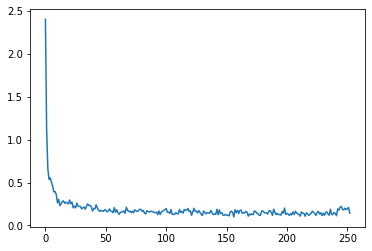

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)